# Experimental Parameter Optimisation using Bayesian Statistics

In [341]:
# import all relevant libraries
%matplotlib notebook
import numpy as np 
import pandas as pd
from math import pi
import seaborn as sns
from scipy.stats import norm
from numpy.random import normal
from numpy.random import random
from numpy import vstack
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

In [42]:
# import csv as 2D numpy array

# file = open("sample.csv")
# numpy_array = np.loadtxt(file, delimiter=",")
# X = numpy_array[:,:-1]
# y = numpy_array[:,-1]


# ====================  OR  ====================

# Create synthetic array

x1 = np.atleast_2d(10*random(10)).T
x2 = np.atleast_2d(10*random(10)).T
x3 = np.atleast_2d(10*random(10)).T
# x4 = np.atleast_2d(10*random(10)).T

X = np.concatenate((x1,x2,x3), axis=1)
# X = X[:,:-1]

In [43]:
# define the objective function
def objective(X, noise=0):
    y = 0
    for i in range(X.shape[1]):
        y += (X[:,i] * np.sin(X[:,i]))
    dy = 0.5 + 1.0 * np.random.normal(0,noise,y.shape)
    y += dy
    return np.atleast_2d(y).T

In [44]:
y = objective(X)
ynoise = objective(X,1)
xrange=np.array([[0,10],[-1,10],[0,11]])
# xrange.shape[0]

In [45]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

# def predict(X, y, xrange, meshdensity, model):
#     # add check: X.shape[1] == xrange.shape[0]
#     grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
#     Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
#     ypred, ystd = surrogate(model,Xmesh)
#     return ypred, ystd;
    

In [46]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    # calculate the best surrogate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xsamples)
    mu = mu[:]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))
    return probs

# optimize the acquisition function
def opt_acquisition(X, y, xrange, sampledensity, model):
    # random search, generate random samples
#     x1points = 10*random(50)
#     x2points = 10*random(50)
#     x1samples, x2samples = np.meshgrid(x1points, x2points)
#     Xsamples = np.concatenate((np.atleast_2d(x1samples.ravel()).T, np.atleast_2d(x2samples.ravel()).T), axis=1)
    
    grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
    Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = np.argmax(scores)
    return Xsamples[ix]

In [47]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [48]:
meshdensity = 3

# plot the surrogate function
# ypred, ystd = predict(X, y, xrange, meshdensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
# ypred, ystd = surrogate(gp,Xmesh)

In [60]:
Xmesh

array([[ 0. , -1. ,  0. ],
       [ 0. , -1. ,  5.5],
       [ 0. , -1. , 11. ],
       [ 5. , -1. ,  0. ],
       [ 5. , -1. ,  5.5],
       [ 5. , -1. , 11. ],
       [10. , -1. ,  0. ],
       [10. , -1. ,  5.5],
       [10. , -1. , 11. ],
       [ 0. ,  4.5,  0. ],
       [ 0. ,  4.5,  5.5],
       [ 0. ,  4.5, 11. ],
       [ 5. ,  4.5,  0. ],
       [ 5. ,  4.5,  5.5],
       [ 5. ,  4.5, 11. ],
       [10. ,  4.5,  0. ],
       [10. ,  4.5,  5.5],
       [10. ,  4.5, 11. ],
       [ 0. , 10. ,  0. ],
       [ 0. , 10. ,  5.5],
       [ 0. , 10. , 11. ],
       [ 5. , 10. ,  0. ],
       [ 5. , 10. ,  5.5],
       [ 5. , 10. , 11. ],
       [10. , 10. ,  0. ],
       [10. , 10. ,  5.5],
       [10. , 10. , 11. ]])

In [9]:
sampledensity = 50

# x = opt_acquisition(X, y, xrange, sampledensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, _ = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
mu, std = surrogate(gp, Xsamples)
mu = mu[:]
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))


# locate the index of the largest scores
ix = np.argmax(scores)

# # x.shape
# actual = objective(np.atleast_2d(x))
# est, _ = surrogate(gp, np.atleast_2d(x))
# x.shape
# print('>x=[%.3f, %.3f], f()=%3f, actual=%.3f' % (x[0],x[1], est, actual))

NameError: name 'x' is not defined

In [10]:
print(Xsamples[ix])

[8.7755102  8.42857143 8.08163265 2.91836735]


## DoE Set 1-3

### Import and clean the data

In [158]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df = df.dropna()
df = df.set_index([pd.Index(np.array(range(97)))])
df13 = df.iloc[0:37]
df13

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200131_1,01/31/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,1.90,23.2,24.681526,Maybe,201.0,0.004975,0.01,False,1,0.000000
1,20200201_1,02/01/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,1.74,23.0,24.697922,No,201.0,0.004975,0.01,False,1,0.000000
2,20200202_1,02/02/20 0:00,500,500,5.0,500.0,0,0.0,500.0,5.0,5.30,23.1,31.548652,Yes,1005.0,0.004975,0.01,False,1,0.627440
3,20200207_1,02/07/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,-1.86,23.2,18.791646,No,201.0,0.004975,0.01,False,1,0.000000
4,20200207_2,02/07/20 0:00,500,500,5.0,500.0,0,0.0,500.0,15.0,-1.86,23.2,18.791646,Yes,1005.0,0.004975,0.01,False,1,0.095754
5,20200307_1,03/07/20 14:35,100,100,1.0,100.0,0,0.0,100.0,7.0,-1.72,22.5,19.808864,No,201.0,0.004975,0.01,False,2,0.000000
6,20200308_1,03/08/20 1:00,140,140,1.4,140.0,0,0.0,140.0,7.0,-1.04,22.8,20.446319,No,281.4,0.004975,0.01,False,2,0.000000
7,20200308_2,03/08/20 19:26,140,140,1.4,140.0,0,0.0,140.0,5.0,0.44,23.3,22.090501,Yes,281.4,0.004975,0.01,False,2,0.049634
8,20200309_1,03/09/20 1:50,140,140,1.4,140.0,0,0.0,140.0,5.0,0.98,23.3,22.967499,Yes,281.4,0.004975,0.01,False,2,0.010908
9,20200309_2,03/09/20 4:10,100,100,1.0,100.0,0,0.0,100.0,7.0,1.42,23.7,23.139883,No,201.0,0.004975,0.01,False,2,0.000000


In [159]:
print(np.unique(df13["Growth Time (min)"]))
print(np.unique(df13["Growth He (sccm)"]))
print(df13["Relative Humidity (pct)"].max())
print(df13["Relative Humidity (pct)"].min())

[ 5.  7. 15.]
[100. 140. 260. 380. 500.]
48.61216254
18.79164591


In [81]:
pidf13 = df13[["ID"]].copy()
pidf13["pi_1"] = (df13["Res: pct. Coverage"]*1.1448336099)/((df13["Growth Time (min)"]*(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"]))**(2/3))
pidf13["pi_2"] = df13["Relative Humidity (pct)"]
pidf13["pi_3"] = df13["Annealing H2 (sccm)"]/(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])
pidf13["pi_4"] = (df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])/(df13["Cooling CH4 (sccm)"]+df13["Cooling H2 (sccm)"]+df13["Cooling He (sccm)"])
pidf13["pi_5"] = df13["Growth CH4 (sccm)"]/(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])
pidf13["pi_6"] = df13["Cooling CH4 (sccm)"]/(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])
pidf13["pi_7"] = df13["Growth H2 (sccm)"]/(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])
pidf13["pi_8"] = df13["Cooling H2 (sccm)"]/(df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"])
pidf13

,ID,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6,pi_7,pi_8
0,20200131_1,0.000000,24.681526,0.497512,2.01,0.004975,0.0,0.497512,0.0
1,20200201_1,0.000000,24.697922,0.497512,2.01,0.004975,0.0,0.497512,0.0
2,20200202_1,0.002448,31.548652,0.497512,2.01,0.004975,0.0,0.497512,0.0
3,20200207_1,0.000000,18.791646,0.497512,2.01,0.004975,0.0,0.497512,0.0
4,20200207_2,0.000180,18.791646,0.497512,2.01,0.004975,0.0,0.497512,0.0
5,20200307_1,0.000000,19.808864,0.497512,2.01,0.004975,0.0,0.497512,0.0
6,20200308_1,0.000000,20.446319,0.497512,2.01,0.004975,0.0,0.497512,0.0
7,20200308_2,0.000453,22.090501,0.497512,2.01,0.004975,0.0,0.497512,0.0
8,20200309_1,0.000099,22.967499,0.497512,2.01,0.004975,0.0,0.497512,0.0
9,20200309_2,0.000000,23.139883,0.497512,2.01,0.004975,0.0,0.497512,0.0


In [142]:
pidf13["pi_2"].max()

48.61216254

In [83]:
X = pidf13.iloc[:,2:].to_numpy()
y = pidf13.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(37, 7)
(37, 1)


In [84]:
xrange = np.array([[0.0,100.0],
                   [0.0,0.5],
                   [0.8,3.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0]])

In [85]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [86]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [87]:
meshdensity = 10

# plot the surrogate function
# ypred, ystd = predict(X, y, xrange, meshdensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [88]:
sampledensity = 10

# x = opt_acquisition(X, y, xrange, sampledensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, _ = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
mu, std = surrogate(gp, Xsamples)
mu = mu[:]
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))


# locate the index of the largest scores
ix = np.argmax(scores)

# # x.shape
# actual = objective(np.atleast_2d(x))
# est, _ = surrogate(gp, np.atleast_2d(x))
# x.shape
# print('>x=[%.3f, %.3f], f()=%3f, actual=%.3f' % (x[0],x[1], est, actual))

In [89]:
print(Xsamples[ix])

[44.44444444  0.5         2.02222222  0.          0.          0.44444444
  0.        ]


In [90]:
yplot = np.array([])
for i in range(10):
    yplot = np.append(yplot, ypred[9050040+(i*100000)])
yplot

array([0.00037298, 0.00038734, 0.00039735, 0.00040266, 0.00040308,
       0.00039859, 0.00038936, 0.00037571, 0.00035812, 0.00033721])

In [93]:
ystd_plot = np.array([])
for i in range(10):
    ystd_plot = np.append(ystd_plot, ystd[9050040+(i*100000)])
ystd_plot

array([0.02175558, 0.02094421, 0.02039038, 0.02015451, 0.02026432,
       0.02070685, 0.02143227, 0.02236718, 0.02343049, 0.02454602])

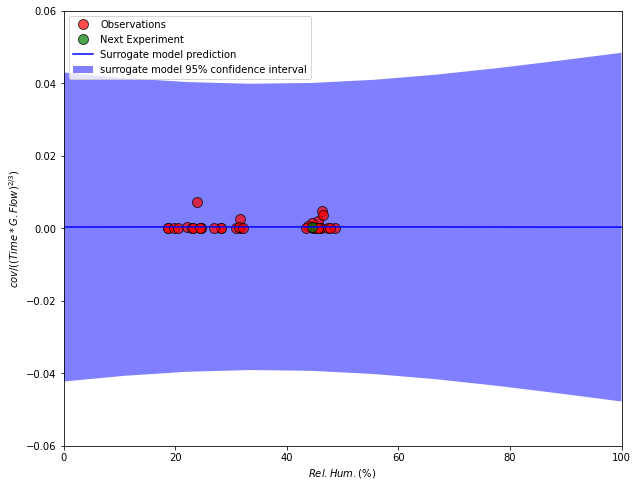

In [140]:
f = plt.figure(figsize=(10,8))
#ax = plt.gca()
ax = f.add_subplot()
Xmesh = np.atleast_2d(np.linspace(0, 100, 10)).T
ax.plot(X[:,0], y, 'ro', markersize=10, label='Observations', mew=1, mec='k', alpha=0.7)
ax.plot(Xsamples[ix][0], ypred[9450040], 'go', markersize=10, label='Next Experiment', mew=1, mec='k', alpha=0.7)
ax.plot(Xmesh, yplot, 'b-', label='Surrogate model prediction')
ax.fill(np.concatenate([Xmesh, Xmesh[::-1]]),
        np.concatenate([yplot - 1.9600 * ystd_plot,
                        (yplot + 1.9600 * ystd_plot)[::-1]]),
        alpha=.5, fc='b', ec='None', label='surrogate model 95% confidence interval')
ax.set_xlim(0, 100)
ax.set_xlabel('$Rel. Hum. (\%)$')
ax.set_ylabel('$cov/((Time * G. Flow)^{2/3})$')
ax.set_ylim(-0.06, 0.06)
ax.legend(loc='upper left')

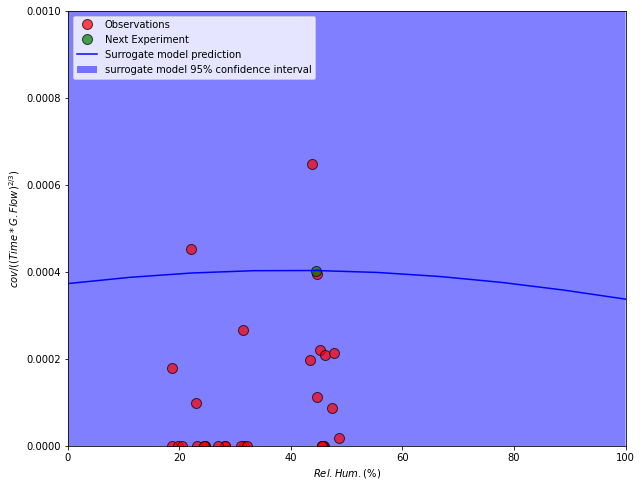

In [143]:
f = plt.figure(figsize=(10,8))
#ax = plt.gca()
ax = f.add_subplot()
Xmesh = np.atleast_2d(np.linspace(0, 100, 10)).T
ax.plot(X[:,0], y, 'ro', markersize=10, label='Observations', mew=1, mec='k', alpha=0.7)
ax.plot(Xsamples[ix][0], ypred[9450040], 'go', markersize=10, label='Next Experiment', mew=1, mec='k', alpha=0.7)
ax.plot(Xmesh, yplot, 'b-', label='Surrogate model prediction')
ax.fill(np.concatenate([Xmesh, Xmesh[::-1]]),
        np.concatenate([yplot - 1.9600 * ystd_plot,
                        (yplot + 1.9600 * ystd_plot)[::-1]]),
        alpha=.5, fc='b', ec='None', label='surrogate model 95% confidence interval')
ax.set_xlim(0, 100)
ax.set_xlabel('$Rel. Hum. (\%)$')
ax.set_ylabel('$cov/((Time * G. Flow)^{2/3})$')
ax.set_ylim(0, 0.001)
ax.legend(loc='upper left')

# DoE Set 1 - 3

## 3 input parameters, 1 output parameter

Input Parameters: Time, Growth Total Flow Rate, Relative Humidity
Output Parameter: coverage

37 points ( + 11 w/o RH)

In [39]:
# Load the data
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
# Drop experiments without a value for %RH
df = df.dropna()
# Select experiments upto Set 3
df13 = df.loc[(df["CP: Set No"]<=3) & (df["Growth Time (min)"]<=10.0)]
# Reset indexing
df13 = df13.set_index([pd.Index(np.array(range(df13.shape[0])))])

df13

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200131_1,01/31/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,1.90,23.2,24.681526,Maybe,201.0,0.004975,0.01,False,1,0.000000
1,20200201_1,02/01/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,1.74,23.0,24.697922,No,201.0,0.004975,0.01,False,1,0.000000
2,20200202_1,02/02/20 0:00,500,500,5.0,500.0,0,0.0,500.0,5.0,5.30,23.1,31.548652,Yes,1005.0,0.004975,0.01,False,1,0.627440
3,20200207_1,02/07/20 0:00,100,100,1.0,100.0,0,0.0,100.0,5.0,-1.86,23.2,18.791646,No,201.0,0.004975,0.01,False,1,0.000000
4,20200307_1,03/07/20 14:35,100,100,1.0,100.0,0,0.0,100.0,7.0,-1.72,22.5,19.808864,No,201.0,0.004975,0.01,False,2,0.000000
5,20200308_1,03/08/20 1:00,140,140,1.4,140.0,0,0.0,140.0,7.0,-1.04,22.8,20.446319,No,281.4,0.004975,0.01,False,2,0.000000
6,20200308_2,03/08/20 19:26,140,140,1.4,140.0,0,0.0,140.0,5.0,0.44,23.3,22.090501,Yes,281.4,0.004975,0.01,False,2,0.049634
7,20200309_1,03/09/20 1:50,140,140,1.4,140.0,0,0.0,140.0,5.0,0.98,23.3,22.967499,Yes,281.4,0.004975,0.01,False,2,0.010908
8,20200309_2,03/09/20 4:10,100,100,1.0,100.0,0,0.0,100.0,7.0,1.42,23.7,23.139883,No,201.0,0.004975,0.01,False,2,0.000000
9,20200310_1,03/10/20 16:45,100,100,1.0,100.0,0,0.0,100.0,7.0,5.44,23.2,31.664745,No,201.0,0.004975,0.01,False,2,0.000000


In [40]:
# Create new dataframe with the experiment ID, output, continuous inputs and discrete inputs (in that order)
pidf13 = df13[["ID"]].copy()
pidf13["Coverage"] = df13["Res: pct. Coverage"]
pidf13["RH"] = df13["Relative Humidity (pct)"]
pidf13["Time"] = df13["Growth Time (min)"]
pidf13["G Flow"] = df13["Growth CH4 (sccm)"]+df13["Growth H2 (sccm)"]+df13["Growth He (sccm)"]

pidf13

,ID,Coverage,RH,Time,G Flow
0,20200131_1,0.000000,24.681526,5.0,201.0
1,20200201_1,0.000000,24.697922,5.0,201.0
2,20200202_1,0.627440,31.548652,5.0,1005.0
3,20200207_1,0.000000,18.791646,5.0,201.0
4,20200307_1,0.000000,19.808864,7.0,201.0
5,20200308_1,0.000000,20.446319,7.0,281.4
6,20200308_2,0.049634,22.090501,5.0,281.4
7,20200309_1,0.010908,22.967499,5.0,281.4
8,20200309_2,0.000000,23.139883,7.0,201.0
9,20200310_1,0.000000,31.664745,7.0,201.0


In [354]:
X = pidf13.iloc[:,2:].to_numpy()
y = pidf13.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(36, 3)
(36, 1)


In [50]:
xrange = np.array([[15.0,65.0], # RH (%)
                   [3.0,10.0], # Time (min)
                   [100,1100]]) # G Flow (sccm)

In [51]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [52]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [140]:
meshdensity = 200

# time_line = np.sort(np.concatenate((np.linspace(xrange[1,0], xrange[1,1], meshdensity),np.unique(X[:,1]))))

# plot the surrogate function
grid = np.meshgrid(*[np.sort(np.concatenate((np.linspace(xrange[i,0], xrange[i,1], meshdensity),np.unique(X[:,i])))) if np.unique(X[:,i]).shape[0]<=10 else np.linspace(xrange[i,0], xrange[i,1], meshdensity) for i in range(xrange.shape[0])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [388]:
print(len(grid))
print(grid[0].shape)

3
(202, 200, 205)


In [141]:
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, ybar = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
Xsamples = Xmesh
mu = ypred
std = ystd
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))

# locate the index of the largest scores
ix = np.argmax(scores)

In [142]:
print("[RH, Time, G Flow]: ", Xsamples[ix])

[RH, Time, G Flow]:  [ 46.40703518   7.         522.6       ]


In [311]:
plot_df = pd.DataFrame(np.concatenate((Xmesh, np.atleast_2d(ypred), np.atleast_2d(ystd).T), axis=1), columns=["RH","Time","G Flow","ypred","ystd"])
plot_df

,RH,Time,G Flow,ypred,ystd
0,15.0,3.0,100.000000,0.0,0.308609
1,15.0,3.0,105.025126,0.0,0.308609
2,15.0,3.0,110.050251,0.0,0.308609
3,15.0,3.0,115.075377,0.0,0.308609
4,15.0,3.0,120.100503,0.0,0.308609
...,...,...,...,...,...
8281995,65.0,10.0,1079.899497,0.0,0.308609
8281996,65.0,10.0,1084.924623,0.0,0.308609
8281997,65.0,10.0,1089.949749,0.0,0.308609
8281998,65.0,10.0,1094.974874,0.0,0.308609


In [323]:
time_val = np.unique(np.sort(np.append(np.unique(X[:,1]),Xsamples[ix][1])))
gflow_val = np.unique(np.sort(np.append(np.unique(X[:,2]),Xsamples[ix][2])))
print(time_val)
print(gflow_val)

[5. 7.]
[ 201.   281.4  522.6  763.8 1005. ]


In [357]:
exp_df = pd.DataFrame(np.concatenate((X, np.atleast_2d(y)), axis=1), columns=["RH","Time","G Flow","y"])
exp_df_t0 = exp_df[exp_df["Time"]==time_val[0]]
exp_df_t1 = exp_df[exp_df["Time"]==time_val[1]]

In [358]:
print(exp_df.shape)
print(exp_df_t0.shape)
print(exp_df_t1.shape)

(36, 4)
(12, 4)
(24, 4)


<IPython.core.display.Javascript object>


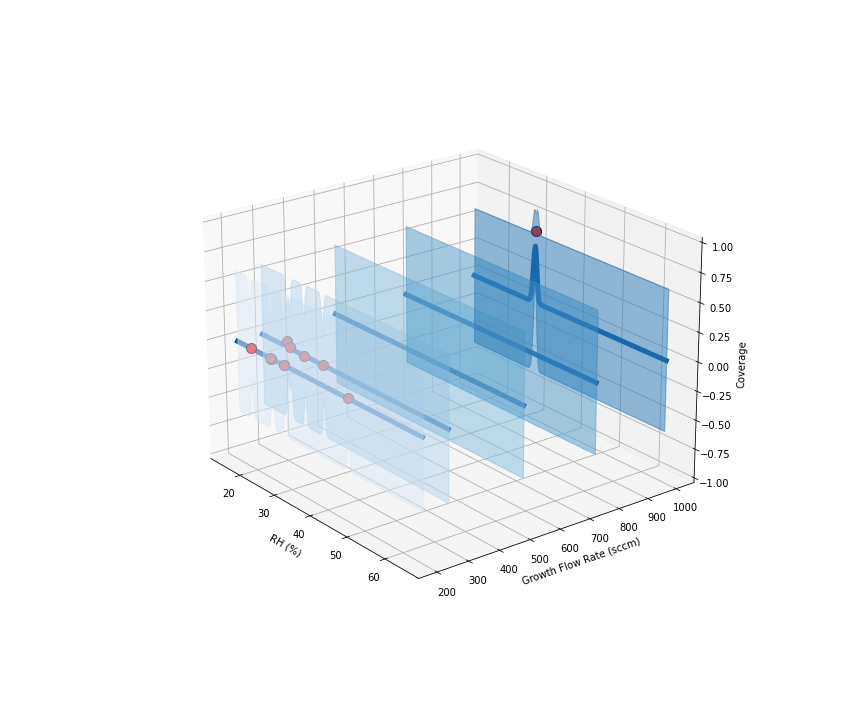

(-1.0, 1.0)

In [389]:
x   = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0])]["RH"])

y00  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0])]["G Flow"])
y01  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1])]["G Flow"])
y02  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[2])]["G Flow"])
y03  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[3])]["G Flow"])
y04  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[4])]["G Flow"])

y10  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0])]["G Flow"])
y11  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1])]["G Flow"])
y12  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[2])]["G Flow"])
y13  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[3])]["G Flow"])
y14  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[4])]["G Flow"])

z00  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0])]["ypred"])
z01  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1])]["ypred"])
z02  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[2])]["ypred"])
z03  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[3])]["ypred"])
z04  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[4])]["ypred"])

z10  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0])]["ypred"])
z11  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1])]["ypred"])
z12  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[2])]["ypred"])
z13  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[3])]["ypred"])
z14  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[4])]["ypred"])

s00  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0])]["ystd"])
s01  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1])]["ystd"])
s02  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[2])]["ystd"])
s03  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[3])]["ystd"])
s04  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[4])]["ystd"])

s10  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0])]["ystd"])
s11  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1])]["ystd"])
s12  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[2])]["ystd"])
s13  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[3])]["ystd"])
s14  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[4])]["ystd"])

pl.figure(figsize=(12,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y00, z00, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y01, z01, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y02, z02, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y03, z03, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y04, z04, color=sns.color_palette("Blues")[5], linewidth = 5)

# ax.plot(x, y10, z10, color='b')
# ax.plot(x, y11, z11, color='r')
# ax.plot(x, y12, z12, color='g')
# ax.plot(x, y13, z13, color='b')
# ax.plot(x, y14, z14, color='g')

ax.add_collection3d(pl.fill_between(x, (z00 - 1.9600*s00), (z00 + 1.9600*s00), color=sns.color_palette("Blues")[0], alpha=0.3), zs=gflow_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z01 - 1.9600*s01), (z01 + 1.9600*s01), color=sns.color_palette("Blues")[1], alpha=0.3), zs=gflow_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z02 - 1.9600*s02), (z02 + 1.9600*s02), color=sns.color_palette("Blues")[2], alpha=0.3), zs=gflow_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z03 - 1.9600*s03), (z03 + 1.9600*s03), color=sns.color_palette("Blues")[3], alpha=0.3), zs=gflow_val[3], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z04 - 1.9600*s04), (z04 + 1.9600*s04), color=sns.color_palette("Blues")[4], alpha=0.3), zs=gflow_val[4], zdir='y')

# ax.add_collection3d(pl.fill_between(x, (z10 - 1.9600*s10), (z10 + 1.9600*s10), color='r', alpha=0.3), zs=gflow_val[0], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z11 - 1.9600*s11), (z11 + 1.9600*s11), color='r', alpha=0.3), zs=gflow_val[1], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z12 - 1.9600*s12), (z12 + 1.9600*s12), color='r', alpha=0.3), zs=gflow_val[2], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z13 - 1.9600*s13), (z13 + 1.9600*s13), color='r', alpha=0.3), zs=gflow_val[3], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z14 - 1.9600*s14), (z14 + 1.9600*s14), color='r', alpha=0.3), zs=gflow_val[4], zdir='y')

ax.plot(exp_df_t0["RH"], exp_df_t0["G Flow"], exp_df_t0["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Flow Rate (sccm)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


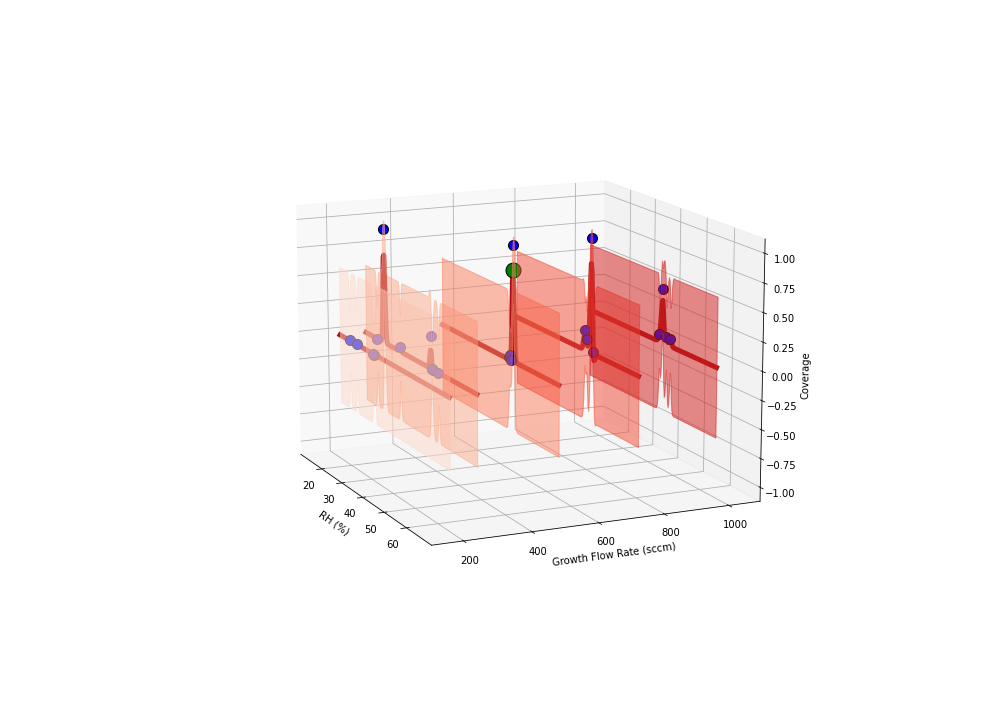

(-1.0, 1.0)

In [390]:
pl.figure(figsize=(14,10))
ax = pl.subplot(projection='3d')

# ax.plot(x, y00, z00, color=sns.color_palette("Blues")[5], linewidth = 5)
# ax.plot(x, y01, z01, color=sns.color_palette("Blues")[5], linewidth = 5)
# ax.plot(x, y02, z02, color=sns.color_palette("Blues")[5], linewidth = 5)
# ax.plot(x, y03, z03, color=sns.color_palette("Blues")[5], linewidth = 5)
# ax.plot(x, y04, z04, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.plot(x, y10, z10, color=sns.color_palette("Reds")[5], linewidth = 5)
ax.plot(x, y11, z11, color=sns.color_palette("Reds")[5], linewidth = 5)
ax.plot(x, y12, z12, color=sns.color_palette("Reds")[5], linewidth = 5)
ax.plot(x, y13, z13, color=sns.color_palette("Reds")[5], linewidth = 5)
ax.plot(x, y14, z14, color=sns.color_palette("Reds")[5], linewidth = 5)

# ax.add_collection3d(pl.fill_between(x, (z00 - 1.9600*s00), (z00 + 1.9600*s00), color=sns.color_palette("Blues")[0], alpha=0.3), zs=gflow_val[0], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z01 - 1.9600*s01), (z01 + 1.9600*s01), color=sns.color_palette("Blues")[1], alpha=0.3), zs=gflow_val[1], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z02 - 1.9600*s02), (z02 + 1.9600*s02), color=sns.color_palette("Blues")[2], alpha=0.3), zs=gflow_val[2], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z03 - 1.9600*s03), (z03 + 1.9600*s03), color=sns.color_palette("Blues")[3], alpha=0.3), zs=gflow_val[3], zdir='y')
# ax.add_collection3d(pl.fill_between(x, (z04 - 1.9600*s04), (z04 + 1.9600*s04), color=sns.color_palette("Blues")[4], alpha=0.3), zs=gflow_val[4], zdir='y')

ax.add_collection3d(pl.fill_between(x, (z10 - 1.9600*s10), (z10 + 1.9600*s10), color=sns.color_palette("Reds")[0], alpha=0.3), zs=gflow_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z11 - 1.9600*s11), (z11 + 1.9600*s11), color=sns.color_palette("Reds")[1], alpha=0.3), zs=gflow_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z12 - 1.9600*s12), (z12 + 1.9600*s12), color=sns.color_palette("Reds")[2], alpha=0.3), zs=gflow_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z13 - 1.9600*s13), (z13 + 1.9600*s13), color=sns.color_palette("Reds")[3], alpha=0.3), zs=gflow_val[3], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z14 - 1.9600*s14), (z14 + 1.9600*s14), color=sns.color_palette("Reds")[4], alpha=0.3), zs=gflow_val[4], zdir='y')

ax.plot(exp_df_t1["RH"], exp_df_t1["G Flow"], exp_df_t1["y"],'bo', markersize=10, label='Observations', mew=1, mec='k')

ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Flow Rate (sccm)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

In [257]:
in_var = 2
values = np.unique(np.sort(np.append(np.unique(X[:,in_var]),Xsamples[ix][in_var])))
locs = []
for v in values:
    locs = np.concatenate((locs, np.array(list(zip(np.where(Xmesh==v)[0],np.where(Xmesh==v)[1]))).reshape(-1)))
locs = locs.reshape(-1,2).astype('uint')
locs_arr = locs[:,0]
locs_arr.shape

(202000,)

In [246]:
b = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
c = [3,6]
t = 2
d = np.array([])
for i in c:
#     print(np.array(list(zip(np.where(b==i)[0],np.where(b==i)[1])))[0])
#     print(type(np.array(list(zip(np.where(b==i)[0],np.where(b==i)[1])))[0]))
#     print(np.array(list(zip(np.where(b==i)[0],np.where(b==i)[1])))[0].shape)
    d = np.concatenate((d, np.array(list(zip(np.where((b==i) & ())[0],np.where((b==i) & ())[1]))).reshape(-1)))
# list(zip(np.where(b<4)[0],np.where(b<4)[1]))
d = d.reshape(-1, 2).astype('uint')
d

array([[0, 2],
       [1, 2]], dtype=uint64)

In [326]:
b = np.array([[1,2,3],[4,2,6],[7,2,6],[10,11,12]])
c = np.array([100,200,300,400])
# c = np.atleast_2d(c).T
d = np.array([1000,2000,3000,4000])
# d = np.atleast_2d(d).T

# test_df = pd.DataFrame(np.concatenate((b,(np.atleast_2d(c)).T,(np.atleast_2d(d)).T), axis=1), columns=["RH","Time","G Flow","ypred","ystd"])
np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0])]["RH"]).shape

(200,)

In [258]:
in_var = 1
np.unique(np.sort(np.append(np.unique(X[:,in_var]),Xsamples[ix][in_var])))

array([5., 7.])

In [338]:
print(sns.color_palette("Blues")[0])
print(sns.color_palette("Blues")[1])

(0.8584083044982699, 0.9134486735870818, 0.9645674740484429)
(0.7309496347558632, 0.8394771241830065, 0.9213225682429834)


In [98]:
print(np.amax(scores))
print(np.amin(scores))

0.10343312872851379
0.0011372065977208938


In [72]:
a = np.mgrid[0:3:4j, 0:4:4j, 0:5:4j]
a

array([[[[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[1.        , 1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        , 1.        ]],

        [[2.        , 2.        , 2.        , 2.        ],
         [2.        , 2.        , 2.        , 2.        ],
         [2.        , 2.        , 2.        , 2.        ],
         [2.        , 2.        , 2.        , 2.        ]],

        [[3.        , 3.        , 3.        , 3.        ],
         [3.        , 3.        , 3.        , 3.        ],
         [3.        , 3.        , 3.        , 3.        ],
         [3.        , 3.        , 3.        , 3.        ]]],


       [[[0.        , 0.        , 0.        , 